In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

fe = fm.FontEntry(
    fname=r'./font/NanumGothic.ttf', name='NanumGothic')                       
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) 

In [3]:
playlists = pd.read_json('../0_data/playlists.json', typ = 'frame', encoding='utf-8')

In [4]:
playlists.head()

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000


---

In [43]:
# 노래 사용 빈도수 확인
ply_song_freq = playlists.explode('songs').groupby('songs').count()['id']
ply_song_freq = pd.DataFrame(ply_song_freq).reset_index()
ply_song_freq.rename(columns={'id':'freq'}, inplace=True)

# 노래 별 좋아요 수 확인
ply_song_like = playlists.explode('songs').groupby('songs').sum()['like_cnt']
ply_song_like = pd.DataFrame(ply_song_like).reset_index()

# 상관관계 확인을 위한 데이터프레임 형성
ply_corr_song = pd.merge(ply_song_like, ply_song_freq, how='left', on='songs')
ply_corr_song.describe()

C:\Users\cg063\AppData\Local\Temp\ipykernel_10540\3420375286.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ply_song_like = playlists.explode('songs').groupby('songs').sum()['like_cnt']


,songs,like_cnt,freq
count,615142.000000,615142.000000,615142.000000
mean,353955.493888,1508.641172,8.592928
std,204338.932425,6652.869225,39.481912
min,0.000000,0.000000,1.000000
25%,176957.250000,13.000000,1.000000
50%,353982.500000,76.000000,2.000000
75%,530864.750000,563.000000,4.000000
max,707988.000000,326947.000000,2175.000000


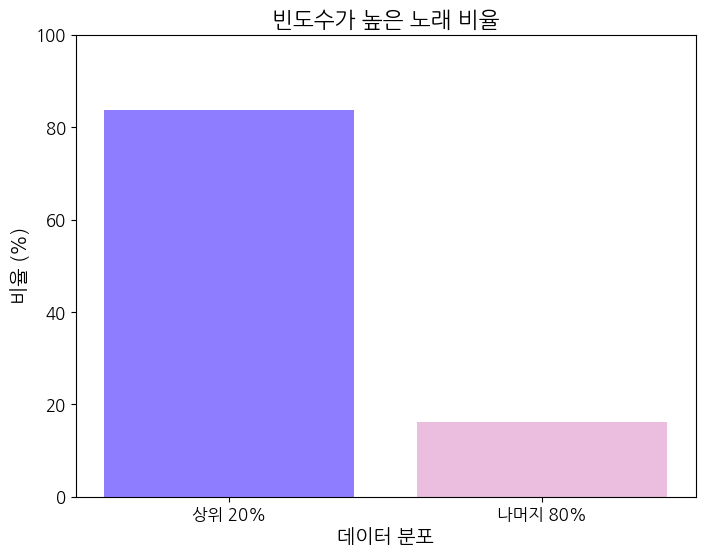

빈도수가 높은 노래 상위 20%가 전체 좋아요의 83.77%를 차지합니다.


In [44]:
# 데이터프레임을 'freq' 열을 기준으로 내림차순 정렬
sorted_df = ply_corr_song.sort_values(by='freq', ascending=False)

# 상위 20%의 노래 선택
top_20_percent = sorted_df.head(int(0.2 * len(sorted_df)))

# 상위 20% 노래의 사용횟수 합계
freq_top_20_percent = top_20_percent['freq'].sum()

# 전체 노래 사용횟수 합계 계산
total_freq = ply_corr_song['freq'].sum()

# 빈도수 상위 20% 노래가 전체 횟수에서 차지하는 비율 계산
percentage = (freq_top_20_percent / total_freq) * 100

# 결과 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
plt.bar(['상위 20%', '나머지 80%'], [percentage, 100 - percentage], color=['#8E7EFF', '#EBBEDF'])
plt.title("빈도수가 높은 노래 비율", fontsize=16)
plt.xlabel("데이터 분포", fontsize=14)
plt.ylabel("비율 (%)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 100)  # y축 범위 설정

plt.show()
print(f"빈도수가 높은 노래 상위 20%가 전체 좋아요의 {percentage:.2f}%를 차지합니다.")

In [45]:
# 태그 사용 빈도수 확인
ply_tag_freq = playlists.explode('tags').groupby('tags').count()['id']
ply_tag_freq = pd.DataFrame(ply_tag_freq).reset_index()
ply_tag_freq.rename(columns={'id':'freq'}, inplace=True)

# 태그 별 좋아요 수 확인
ply_tag_like = playlists.explode('tags').groupby('tags').sum()['like_cnt']
ply_tag_like = pd.DataFrame(ply_tag_like).reset_index()

# 상관관계 확인을 위한 데이터프레임 형성
ply_corr_tag = pd.merge(ply_tag_like, ply_tag_freq, how='left', on='tags')
ply_corr_tag.describe()

C:\Users\cg063\AppData\Local\Temp\ipykernel_10540\3976850263.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ply_tag_like = playlists.explode('tags').groupby('tags').sum()['like_cnt']


,like_cnt,freq
count,2.916000e+04,29160.000000
mean,2.010221e+03,16.335082
std,3.131825e+04,247.011075
min,0.000000e+00,1.000000
25%,7.000000e+00,1.000000
50%,2.500000e+01,1.000000
75%,1.510000e+02,3.000000
max,2.253288e+06,16465.000000


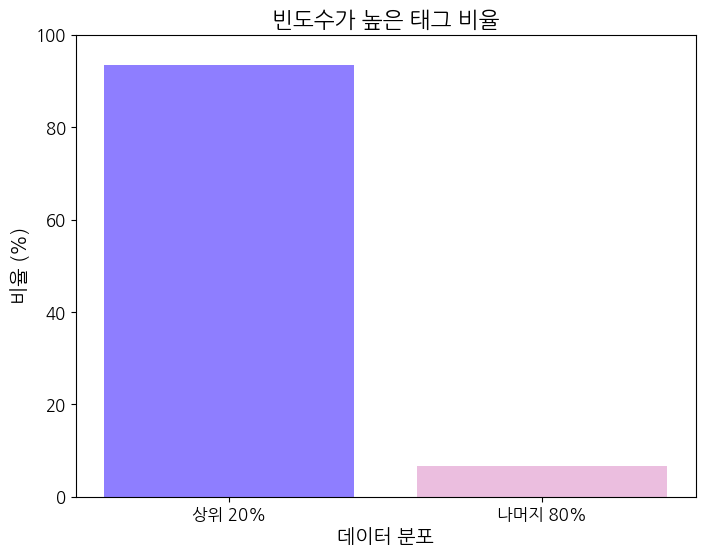

빈도수가 높은 노래 상위 20%가 전체 좋아요의 93.42%를 차지합니다.


In [46]:
# 데이터프레임을 'freq' 열을 기준으로 내림차순 정렬
sorted_df = ply_corr_tag.sort_values(by='freq', ascending=False)

# 상위 20%의 태그 선택
top_20_percent = sorted_df.head(int(0.2 * len(sorted_df)))

# 상위 20% 태그의 사용횟수 합계
freq_top_20_percent = top_20_percent['freq'].sum()

# 전체 태그 사용횟수 합계 계산
total_freq = ply_corr_tag['freq'].sum()

# 빈도수 상위 20% 태그가 전체 횟수에서 차지하는 비율 계산
percentage = (freq_top_20_percent / total_freq) * 100

# 결과 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
plt.bar(['상위 20%', '나머지 80%'], [percentage, 100 - percentage], color=['#8E7EFF', '#EBBEDF'])
plt.title("빈도수가 높은 태그 비율", fontsize=16)
plt.xlabel("데이터 분포", fontsize=14)
plt.ylabel("비율 (%)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 100)  # y축 범위 설정

plt.show()
print(f"빈도수가 높은 노래 상위 20%가 전체 좋아요의 {percentage:.2f}%를 차지합니다.")